# Exploratory Data Analysis

In [12]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

## Overview of EDA

Exploratory Data Analysis (EDA) is a critical initial step in data analysis where researchers investigate datasets to understand their structure, patterns, and potential issues.



In [4]:
# read in the data
dataset_path_clean_laptops = Path.cwd().parent / "data" / "OUTPUT_laptops.parquet"
laptops = pd.read_parquet(dataset_path_clean_laptops)
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   manufacturer       1274 non-null   category
 1   model_name         1274 non-null   string  
 2   category           1274 non-null   category
 3   ram_gb             1274 non-null   UInt8   
 4   gpu                1274 non-null   string  
 5   os                 1274 non-null   category
 6   os_version         1274 non-null   category
 7   weight_kg          1274 non-null   Float32 
 8   price_euros        1274 non-null   Float32 
 9   gpu_manufacturer   1274 non-null   category
 10  cpu_manufacturer   1274 non-null   category
 11  screen_width_px    1274 non-null   UInt16  
 12  screen_high_px     1274 non-null   UInt16  
 13  storage_ssd_gb     1274 non-null   Int64   
 14  storage_hdd_gb     1274 non-null   Int64   
 15  storage_flash_gb   1274 non-null   Int64   
 16  storag

## Descriptive Statistics and Data Summarization

## Data Aggregation

In the world of data analysis, you often work with large datasets containing many rows of detailed information. However, for decision-making or further analysis, you usually don’t need to inspect every individual record. Instead, you need to summarize or aggregate the data to:
- Reveal Trends: Understand the overall performance (e.g., total sales, average ratings) rather than just individual data points.
- Compare Groups: Compare different categories, such as sales by region or performance by department.
- Simplify Analysis: Reduce the data to a manageable size while preserving essential patterns.
- Enhance Reporting: Create meaningful summaries that are easy to visualize and interpret.

Data aggregation helps to condense your dataset, making it easier to draw insights and take informed actions.

Before diving into the groupby method, it’s important to understand the **split-apply-combine** strategy—a common paradigm in data analysis that underlies many aggregation techniques.
- **Split**: Divide the dataset into groups based on one or more key variables (for example, grouping sales records by store).
- **Apply**: Perform an operation on each group independently. This could be a statistical function like sum, mean, or even a custom transformation.
- **Combine**: Merge the individual results from each group back into a single data structure.

This strategy allows analysts to work on each group separately and then bring the results together in a concise summary.

{'Netbook': np.float32(673.3826), 'Notebook': np.float32(789.24585), '2 in 1 Convertible': np.float32(1289.7145), 'Ultrabook': np.float32(1556.676), 'Gaming': np.float32(1731.3806), 'Workstation': np.float32(2280.359)}


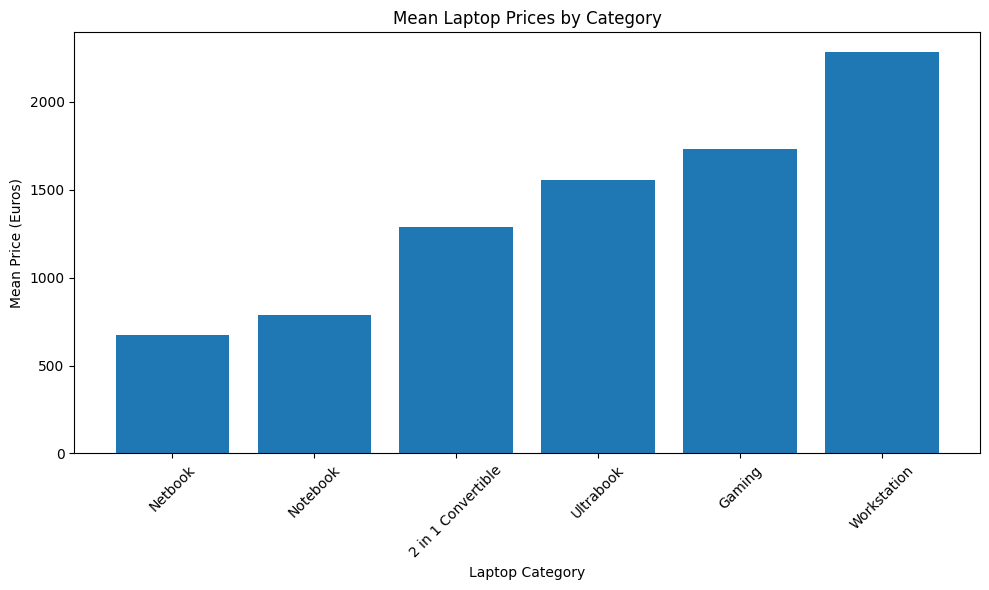

In [14]:
# To better understand what split-apply-combine is doing, here's a manual
# implementation using a for loop.
# Don't use this in practice, it's just for illustration.

mean_prices = {}

for laptop_category in laptops["category"].unique():
    category_group = laptops[laptops["category"] == laptop_category]
    mean_price = category_group["price_euros"].mean()
    mean_prices[laptop_category] = mean_price

print(mean_prices)

# Plot the mean prices for each category
plt.figure(figsize=(10, 6))
plt.bar(mean_prices.keys(), mean_prices.values())
plt.xlabel("Laptop Category")
plt.ylabel("Mean Price (Euros)")
plt.title("Mean Laptop Prices by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pandas implements the split-apply-combine strategy using its powerful `groupby` method. Here’s what happens under the hood:
- **Splitting the Data**: When you call `df.groupby('Column')`, pandas scans the specified column and divides the DataFrame into subsets, where each subset contains rows sharing the same value in that column.
- **Applying a Function**: Once the data is split, you can apply a function to each group. This function could be an aggregation (like sum, mean, min, or max), a transformation (like scaling or normalizing), or even a filtering function. Pandas efficiently applies these operations to each subset.
- **Combining the Results**: After the function is applied, pandas combines the output into a new DataFrame or Series. This new structure presents the aggregated results in a clear, tabular format.

The elegance of groupby is that it abstracts away the need for explicit loops, providing a more efficient and readable approach to data aggregation.

Suppose you have a dataset of sales records for different stores. You want to calculate the total sales per store.

In [17]:
data = {"Store": ["A", "A", "B", "B", "C", "C"], "Sales": [100, 200, 150, 250, 300, 400]}
df = pd.DataFrame(data)

# Group by 'Store' and sum the 'Sales'
total_sales = df.groupby("Store")["Sales"].sum()

print("Total sales per store:")
total_sales

Total sales per store:


Store
A    300
B    400
C    700
Name: Sales, dtype: int64

In [22]:
print(laptops.groupby("category", observed=True).groups)

{'2 in 1 Convertible': [34, 53, 62, 83, 105, 108, 114, 199, 200, 217, 233, 262, 316, 323, 333, 339, 345, 347, 353, 365, 367, 373, 382, 388, 398, 432, 457, 471, 476, 479, 484, 498, 501, 510, 512, 514, 517, 523, 524, 539, 542, 555, 568, 588, 612, 645, 649, 650, 653, 673, 682, 696, 708, 714, 759, 767, 780, 806, 810, 844, 850, 859, 863, 864, 866, 871, 884, 894, 910, 914, 919, 959, 960, 964, 965, 996, 1006, 1008, 1011, 1019, 1020, 1033, 1034, 1044, 1050, 1060, 1061, 1065, 1066, 1069, 1072, 1075, 1078, 1082, 1084, 1106, 1107, 1108, 1123, 1129, ...], 'Gaming': [400, 408, 463, 478, 491, 499, 500, 506, 515, 520, 541, 547, 549, 564, 571, 577, 589, 594, 602, 604, 608, 633, 637, 641, 643, 644, 646, 647, 651, 652, 663, 668, 670, 674, 678, 690, 695, 702, 710, 717, 723, 725, 732, 739, 743, 744, 752, 758, 761, 769, 774, 775, 776, 777, 779, 786, 789, 790, 792, 793, 795, 799, 801, 804, 805, 807, 809, 824, 827, 828, 829, 831, 836, 840, 842, 845, 853, 857, 861, 862, 865, 869, 870, 874, 877, 878, 883, 886,

In [ ]:
# Get maximum price for each category
max_prices = laptops.groupby("category", observed=True)["price_euros"].max()
max_prices

category
2 in 1 Convertible    2824.0
Gaming                6099.0
Netbook               1908.0
Notebook              4899.0
Ultrabook             3100.0
Workstation           4389.0
Name: price_euros, dtype: Float32

You can also perform multiple operations on grouped data at once. 

In [ ]:
def dif(group):
    return group.max() - group.min()


laptops.groupby("category", observed=True)["price_euros"].agg(["mean", "max", "median", "std", dif])

,mean,max,median,std,dif
category,,,,,
2 in 1 Convertible,1289.714478,2824.0,1199.0,617.436646,2549.0
Gaming,1731.380615,6099.0,1492.800049,814.174438,5400.0
Netbook,673.382629,1908.0,355.0,592.093384,1734.0
Notebook,789.24585,4899.0,696.5,446.941772,4703.0
Ultrabook,1556.676025,3100.0,1499.0,484.737335,2601.0
Workstation,2280.358887,4389.0,2064.899902,712.643555,3020.0


Data aggregation is a vital step in the data analysis process, as it transforms large, detailed datasets into meaningful summaries. The split-apply-combine strategy is the conceptual framework behind many aggregation techniques.

In [8]:
# Exercise 1: Are laptops made by Apple more expensive than those made by
# other manufacturers?
laptops.groupby("manufacturer", observed=False)["price_euros"].mean().sort_values(ascending=False)

manufacturer
Razer                       3346.142822
LG                               2099.0
Micro-Star International    1728.908081
Google                      1677.666626
Microsoft                   1612.308228
Apple                       1564.198608
Huawei                           1424.0
Samsung                     1413.444458
Toshiba                       1267.8125
Dell                        1199.225098
Xiaomi                      1133.462524
Asus                        1128.391602
Lenovo                      1093.862183
HP                          1080.314697
Fujitsu                           729.0
Acer                         633.464478
Chuwi                        314.296661
Mediacom                          295.0
Vero                         217.425003
Name: price_euros, dtype: Float32

In [9]:
# Exercise 2: What is the best value laptop with a screen size of 38 cm or more?
cols_to_show = ["manufacturer", "model_name", "price_euros", "screen_size_cm"]
best_value_laptop = laptops.loc[laptops["screen_size_cm"] >= 38, cols_to_show].sort_values("price_euros")
print(f"Best value laptop is {best_value_laptop.iloc[0]['manufacturer']} {best_value_laptop.iloc[0]['model_name']} with price {best_value_laptop.iloc[0]['price_euros']} euros")
best_value_laptop.head()

Best value laptop is Acer Chromebook C910-C2ST with price 199.0 euros


,manufacturer,model_name,price_euros,screen_size_cm
3,Acer,Chromebook C910-C2ST,199.0,39.624001
7,Acer,Chromebook 15,209.0,39.624001
9,Asus,A541NA-GO342,224.0,39.624001
13,Chuwi,"LapBook 15.6""",244.990005,39.624001
15,Chuwi,"Lapbook 15,6",248.899994,39.624001


In [11]:
# Exercise 3: Which laptop has the most RAM?
cols_to_show = ["manufacturer", "model_name", "ram_gb"]
most_ram_laptop = laptops.loc[laptops["ram_gb"] == laptops["ram_gb"].max(), cols_to_show]
most_ram_laptop

,manufacturer,model_name,ram_gb
1268,Asus,ROG G701VO,64


## Visualizing Data Insights

## Reshaping Data: Melting and Pivoting

## End-to-End EDA Workflow